# Basic simulation with Impact Python Client

In [2]:
from modelon.impact.client import Range,Choices

from sys import stdout
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

import scipy.optimize as optimize

%matplotlib inline

#### Connect to Modelon Impact ####

In [3]:
from modelon.impact.client import Client
client = Client(url="http://localhost:8080/",interactive=False)

# Set up the workspace
workspace = client.get_workspace("MarsRovers1")

# Prepare a dynamic simulation
dynamic = workspace.get_custom_function('dynamic')

No Modelon Impact API key could be found, will log in as anonymous user. Permissions may be limited


#### Get model and run experiment ####

In [6]:
model = workspace.get_model("Perseverance.Experiments.DrivingFlat")

experiment_definition = model.new_experiment_definition(dynamic.with_parameters(start_time=0.0, final_time=10.0))

experiment = workspace.execute(experiment_definition).wait()

#### Plot signals ####

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
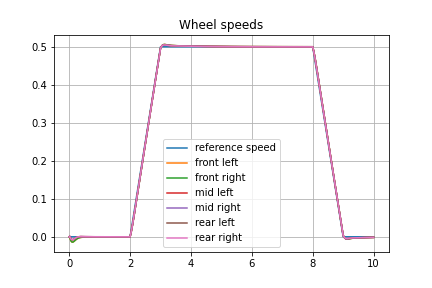

In [11]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.figure(1)
plt.clf()
plt.title('Wheel speeds')
for case in experiment.get_cases():
    if case.is_successful():
        result = case.get_trajectories()
        plt.plot(result['time'], result['speedSource.y'])
        plt.plot(result['time'], result['chassis.wheel_1.summary_w'])
        plt.plot(result['time'], result['chassis.wheel_2.summary_w'])
        plt.plot(result['time'], result['chassis.wheel_3.summary_w'])
        plt.plot(result['time'], result['chassis.wheel_4.summary_w'])
        plt.plot(result['time'], result['chassis.wheel_5.summary_w'])
        plt.plot(result['time'], result['chassis.wheel_6.summary_w'])
plt.legend(['reference speed','front left','front right','mid left','mid right','rear left','rear right'])
plt.grid()
plt.show()